In [27]:
import pandas as pd

import os

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [28]:
df_cohort = pd.read_csv('data/customer_rfmt_data.csv')
df_cohort.head()

,CustomerID,InvoiceDate_Day,Monetary
0,12347.0,2010-12-07,711.79
1,12347.0,2011-01-26,475.39
2,12347.0,2011-04-07,636.25
3,12347.0,2011-06-09,382.52
4,12347.0,2011-08-02,584.91


1. Get InvoiceMonth - Month of Invoice/Transaction

In [29]:
df_cohort['InvoiceDate_Day'] = pd.to_datetime(df_cohort['InvoiceDate_Day'])
df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate_Day'].apply(lambda x: x.replace(day=1, hour=0, minute=0, second=0))
df_cohort.head()

,CustomerID,InvoiceDate_Day,Monetary,InvoiceMonth
0,12347.0,2010-12-07,711.79,2010-12-01
1,12347.0,2011-01-26,475.39,2011-01-01
2,12347.0,2011-04-07,636.25,2011-04-01
3,12347.0,2011-06-09,382.52,2011-06-01
4,12347.0,2011-08-02,584.91,2011-08-01


2. Get CohortMonth - Customer's first Month of Invoice/Transaction

In [30]:
df_cohort['CohortMonth'] = df_cohort.groupby('CustomerID')['InvoiceMonth'].transform('min')
df_cohort.head()

,CustomerID,InvoiceDate_Day,Monetary,InvoiceMonth,CohortMonth
0,12347.0,2010-12-07,711.79,2010-12-01,2010-12-01
1,12347.0,2011-01-26,475.39,2011-01-01,2010-12-01
2,12347.0,2011-04-07,636.25,2011-04-01,2010-12-01
3,12347.0,2011-06-09,382.52,2011-06-01,2010-12-01
4,12347.0,2011-08-02,584.91,2011-08-01,2010-12-01


3. Get CohortIndex - Number of time periods (months) that passed since a customer's first Month of Invoice/Transaction

Cohort Index = (Invoice Year - Cohort Year) * 12 + (Invoice Month - Cohort Month) + 1

In [31]:
# Extract year and month
invoice_year, invoice_month = df_cohort['InvoiceDate_Day'].dt.year, df_cohort['InvoiceDate_Day'].dt.month
cohort_year, cohort_month = df_cohort['CohortMonth'].dt.year, df_cohort['CohortMonth'].dt.month

# Calculate year and month differences
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# Create the CohortIndex
df_cohort['CohortIndex'] = (years_diff * 12) + months_diff + 1
df_cohort = df_cohort[['CustomerID', 'CohortMonth', 'CohortIndex']]
df_cohort.head()

,CustomerID,CohortMonth,CohortIndex
0,12347.0,2010-12-01,1
1,12347.0,2010-12-01,2
2,12347.0,2010-12-01,5
3,12347.0,2010-12-01,7
4,12347.0,2010-12-01,9


4. Get cohort chart - Shows the number of unique customers from each cohort who made purchases in subsequent months.

In [38]:
df_cohort['CohortMonth'] = pd.to_datetime(df_cohort['CohortMonth'])

# Create a string representation for display purposes
df_cohort['CohortMonthStr'] = df_cohort['CohortMonth'].dt.strftime('%B %Y')

# Group by CohortMonth (datetime) and CohortIndex, then count unique customers
cohort_data = df_cohort.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

# Sort by CohortMonth (datetime) to ensure chronological order
cohort_data = cohort_data.sort_values(by='CohortMonth')

# Create the pivot table using the string representation for display
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts.index = cohort_counts.index.strftime('%B %Y')

display(cohort_counts)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
December 2010,768.0,321.0,283.0,337.0,319.0,351.0,318.0,305.0,312.0,348.0,328.0,441.0,233.0
January 2011,333.0,89.0,110.0,95.0,132.0,118.0,104.0,100.0,124.0,136.0,153.0,49.0,NaN
February 2011,289.0,70.0,71.0,109.0,102.0,92.0,96.0,104.0,93.0,116.0,26.0,NaN,NaN
March 2011,319.0,64.0,114.0,90.0,101.0,75.0,119.0,104.0,126.0,39.0,NaN,NaN,NaN
April 2011,197.0,63.0,61.0,63.0,59.0,68.0,64.0,78.0,22.0,NaN,NaN,NaN,NaN
May 2011,190.0,54.0,49.0,49.0,59.0,67.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
June 2011,152.0,41.0,39.0,64.0,56.0,80.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,108.0,31.0,38.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,89.0,34.0,41.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


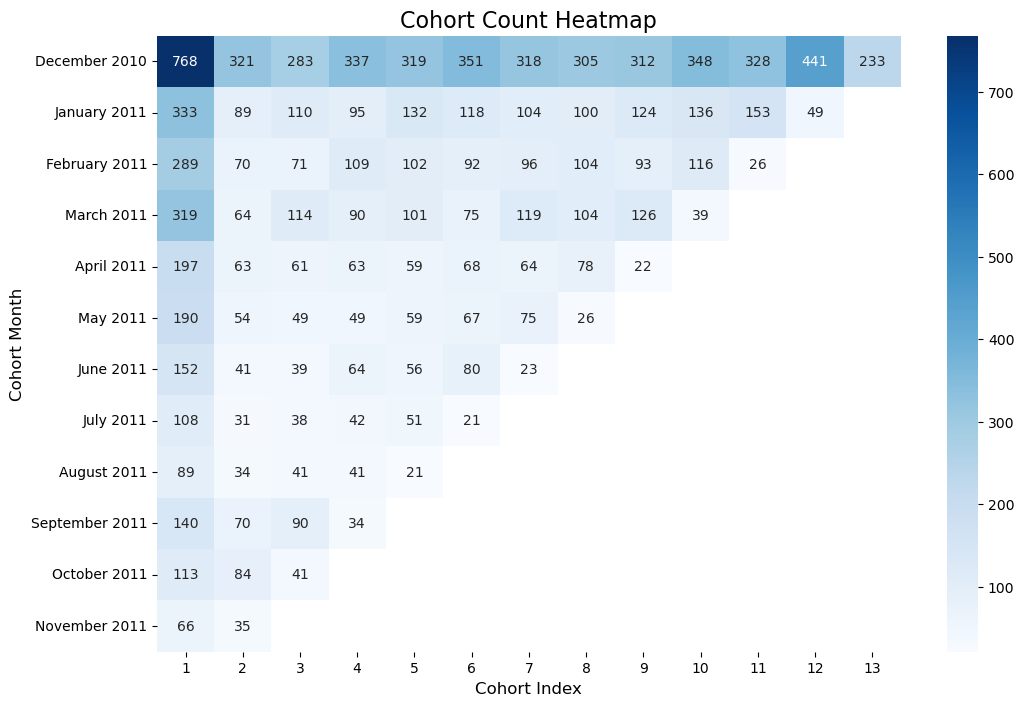

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_counts, annot=True, fmt="g", cmap="Blues", cbar=True)
plt.title("Cohort Count Heatmap", fontsize=16)
plt.xlabel("Cohort Index", fontsize=12)
plt.ylabel("Cohort Month", fontsize=12)
plt.show()

5. Get retention rate - Divide cohort counts by cohort size

In [40]:
# Get the size of each cohort
cohort_sizes = cohort_counts.iloc[:, 0]

# Divide each subsequent column by the cohort size
retention = cohort_counts.divide(cohort_sizes, axis=0)

display(retention.round(3) * 100) # Format as percentage 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
December 2010,100.0,41.8,36.8,43.9,41.5,45.7,41.4,39.7,40.6,45.3,42.7,57.4,30.3
January 2011,100.0,26.7,33.0,28.5,39.6,35.4,31.2,30.0,37.2,40.8,45.9,14.7,NaN
February 2011,100.0,24.2,24.6,37.7,35.3,31.8,33.2,36.0,32.2,40.1,9.0,NaN,NaN
March 2011,100.0,20.1,35.7,28.2,31.7,23.5,37.3,32.6,39.5,12.2,NaN,NaN,NaN
April 2011,100.0,32.0,31.0,32.0,29.9,34.5,32.5,39.6,11.2,NaN,NaN,NaN,NaN
May 2011,100.0,28.4,25.8,25.8,31.1,35.3,39.5,13.7,NaN,NaN,NaN,NaN,NaN
June 2011,100.0,27.0,25.7,42.1,36.8,52.6,15.1,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,100.0,28.7,35.2,38.9,47.2,19.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,100.0,38.2,46.1,46.1,23.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


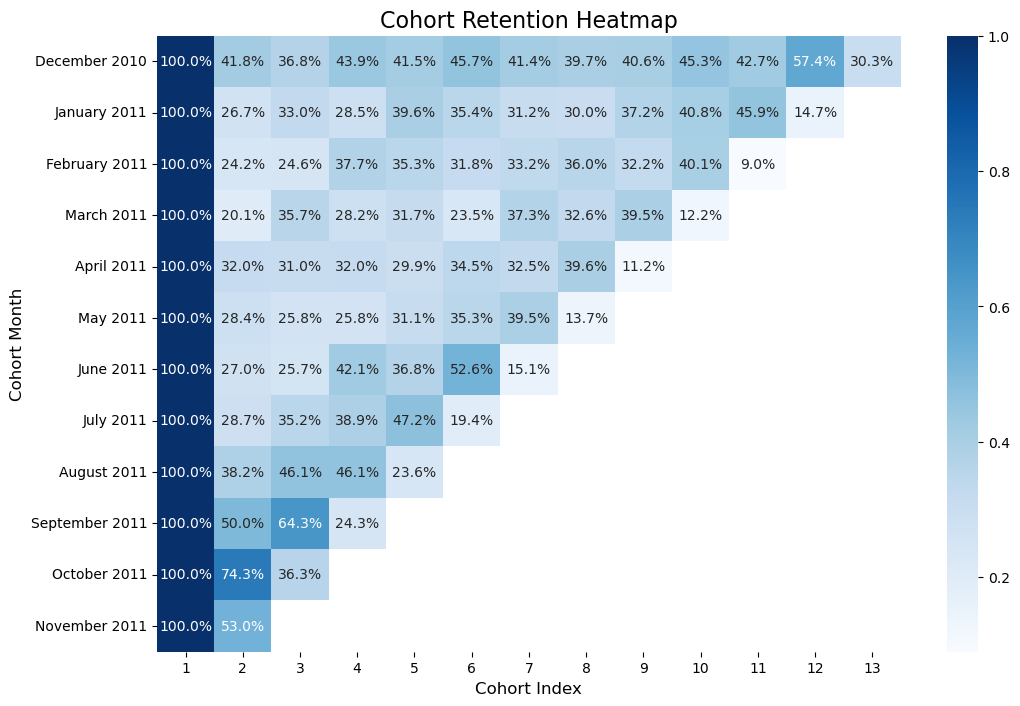

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt=".1%", cmap="Blues", cbar=True)
plt.title("Cohort Retention Heatmap", fontsize=16)
plt.xlabel("Cohort Index", fontsize=12)
plt.ylabel("Cohort Month", fontsize=12)
plt.show()

### BUSINESS INSIGHTS

1. Inconsistent Retention

* **"Bad" Cohorts (Q1 2011):** Cohorts from January, February, and March 2011 performed poorly.  
    * **Jan 2011:** Only 26.7% retention in Month 2.
    * **Feb 2011:** Only 24.2% retention in Month 2.
    * **Mar 2011:** Only 20.1% retention in Month 2.
    * **Insight:** Low-quality customers acquired during this period. Investigate what caused this (e.g., product/service may have failed to engage them). We struggled to convert them into repeat purchasers immed.

* **"Good" Cohorts (Q3/Q4 2011):** Cohorts from September and October cohorts performed strongly.
    * **Sep 2011:** Started strong (50.0% in Month 2) and got even stronger (**64.3% in Month 3**).
    * **Oct 2011:** A record-breaking **74.3% retention** in Month 2.
    * **Insight:** High quality customers acquired during this period. Investigate what caused this (e.g., a new marketing channel, a hit feature, a specific promotion) and replicate it.

2. Original Cohort is resilient

* **Dec 2010:** Most resilient cohort.  
    * **High, Stable Retention:** After an initial drop, retention rate stabilizes at a very healthy 40-45% for almost a full year.
    * **Massive Re-engagement:** They show a huge spike to **57.4% in Month 12** (November 2011). Investigate what caused this (e.g., successful holiday marketing campaign or an anniversary offer that resonated with them).
    * **Insight:** These are ideal customers. Analyze their characteristics (How were they acquired? What are their demographics? What products do they buy?) to build a profile of the perfect customer.

3. Strong pre-Holiday Seasonality

* **Sample Observations:** 
    * **June 2011:** Increases from 36.8% (Month 5/Oct) to 52.6% (Month 6/Nov).
    * **July 2011:** Increases from 38.9% (Month 4/Oct) to 47.2% (Month 5/Nov).
    * **Insight:** Business has a major peak in **November** for holiday shopping. Customers who were acquired months prior are returning to make holiday purchases.

4. Lowest Retention on July and August

* **Sample Observations:**
    * **May 2011:** 25.8% (Month 3-4/July-Aug)
    * **June 2011:** 25.7% (Month 3/Aug)
    * **July 2011:** 28.5% (Month 2/Aug).
    * **Insight:** We lost a lot of customers on. This is a major problem in the customer lifecycle. Investigate what happened during this period (Are subscriptions ending? Is a warranty expiring? Do marketing emails stop?).

### BUSINESS QUESTIONS
1.  **What happened in September and October 2011?** Replicate good cohorts--best acquisition period. 
2.  **What went wrong in Q1 2011 (Jan-Mar)?** Avoid bad cohorts--worst acquisition period.
3.  **Why is the December 2010 cohort stronger than other cohorts?** Profile them and find more people like them.
4.  **What is causing the customer drop-off on July and August?** Need to fix the biggest "leak" immediately.


### BUSINESS ACTIONS
1. Focus on the "Second Purchase". Implement a targeted onboarding campaign for new customers. Send a "welcome" email series that includes a special offer or discount on their *second* purchase, valid for 30-45 days.
2. Lean into Seasonality. Launch "Welcome Back" marketing campaigns in October and November. Specifically target customers who haven't purchased since the *last* holiday season or since the beginning of the year. 